# HI-rich but low star formation galaxies in MaNGA
## An example notebook utilizing ``shastra``
This notebook shows an implementation of the ``shastra`` package to conduct research, particularly generating some plots used in publication [HI-rich but low star formation galaxies in MaNGA: physical properties and comparison to control samples](https://academic.oup.com/mnras/article-abstract/526/1/1573/7264872?redirectedFrom=fulltext). The objective of this notebook is to provide an example of the usage of the package more than to replicate the results and analysis of the paper. 

Report any bugs, suggestions, or thoughts to Anubhav Sharma at [anubhavprasadsharma@gmail.com](mailto:anubhavprasadsharma@gmail.com).

### 1. Importing all the classes
The first step is to import classes available in ``shastra`` organized inside the utils directory.

In [ ]:
from shastra.utils.data import Data, Column
from shastra.utils.research import Research, Sample

### 2. Creating a Data object
Before beginning a research project, identifying the relevant dataset is the undoubtedly the first step. In ``shastra``, this can be done by using the ``Data`` object. Since most astrophysics datasets are available as a ``fits`` file, ``Data`` is designed to read ``fits`` file and all you need to do is provide the path to your dataset. Additionally, ``Data`` accepts a ``primaryKey`` parameter which can be used to identify a unique row in the data file. In the example below, PLATEIFU of galaxies is used as the primary key which is named as "PLATEIFU_1" in the column. Another valid primary key for this example could be MANGAID.

In [3]:
# Defining a path where the fits file is located
dataPath = "shastra/data/Match-himanga_dr3_062321__MPL11_WISE__SDSS17Pipe3D_v3_1_1__drpall-v3_1_1-manga__dapall-v3_1_1-3.1.0-mastarhc2.fits"

# Constructing a Data object
allData = Data(dataPath=dataPath, primaryKey='PLATEIFU_1')

### 3. Getting a sample by filtering Data based on Columns
Usually, the dataset defined above is large and one is interested in a particular subset of the data. Shastra features ability to create simple filters using ``Column`` object. To create a ``Column`` object, you need to pass in a ``Data`` object and name of the column. 

In our example, we are interested in HI rich galaxies with low star formation rates. To find these galaxies, we can first filter ``allData`` to a subset having HI mass greater than 0 and eventually, W2 - W3 less than 2. For reference on using W2-W3 as proxy for star formation rate, consult the [research paper](https://browse.arxiv.org/pdf/2309.04854.pdf). In this way, we can easily find the plateifus (using the ``primaryKeyList`` attribute of the ``Data`` class) satisfying our critera, making it easier for sample selection.

Note that the sample size of HI Rich Low SFR galaxies we use for the research is 83 while this naive selection results in 313 galaxies. This is primarily because in the publication, we also omit any bundles that which aren’t galaxies, or are pairs of galaxies, or have DAPqual flag set to ‘CRITICAL’, as well as any HI detections which fail the test for possible confusion. Specific filters like these are currently beyond the scope of ``shastra`` package.

In [ ]:
# Creating a Column object for the Data defined above, particularly this column is the values of HI mass for the galaxies identified by name "LOGMHI".
HImass = Column(data=allData, columnName="LOGMHI")

# Filtering data based on the column values. HIrichData is a subset of allData where HImass Column values are greater than 0. Other supported operations are (<, <=, >, >=, ==, !=).
HIrichData = HImass > 0

# Defining two more columns in the HIrichData
W2_HIrich = Column(data=HIrichData, columnName="W2_mag")
W3_HIrich = Column(data=HIrichData, columnName="W3_mag")

# We can easily perform binary operations on two Column objects or a Column object and a scalar.
# Note that the resulting column is automatically added to the existing Data which the consituent Column objects were part of. Other supported operations are (+, -, *, /, **).
SFRproxy_HIrich = W2_HIrich - W3_HIrich

# Filtering data based on the SFRproxy_HIrich Column that was just defined.
HIrichLowSFRdata = SFRproxy_HIrich < 2

# Once the data is defined, we can easily retrive the galaxies satisfying the criteria (using plateifus, which was defined as primaryKey for Data) using the primaryKeyList attribute.
HIrichLowSFR_mainSample = HIrichLowSFRdata.primaryKeyList
HIrichLowSFR_mainSample

### 4. Creating a Sample object
Step 3 above can be repeated and refined as many times as needed until a final list of interesting galaxies is obtained. Additionally, for robust results, one might be interested in having some control samples to compare it to your primary sample. In ``shastra``, a ``Sample`` object is a layer around these primary and control samples you may define. Defining a ``Sample`` needs two parameters: a ``name`` and ``ids``, a list of your objects identified by the ``primaryKey`` of the ``Data`` you will eventually connect this to.

In our example, our primary sample is HI Rich Low SFR galaxies and we also define two control samples: High SF Control and Low HI Control. We will identify them using list of plateifus.

In [6]:
# List of samples, each is a list of plateifus.
Plateifu_sample = ['10220-1901', '10220-9101', '10223-3703', '10494-3703', '10494-6104', '10499-3701', '10513-12704', '10513-9101', '10516-3701', '10842-12702', '10845-1902', '11824-9101', '11965-12705', '11970-12704', '12484-6102', '12487-6104', '12488-6101', '7957-12701', '7957-6102', '7960-3702', '7979-3701', '7991-3704', '7991-6101', '7992-9101', '7993-12704', '8091-9101', '8092-3701', '8093-9102', '8134-6102', '8135-6103', '8138-3702', '8139-6101', '8150-6102', '8154-6103', '8243-3701', '8250-3702', '8252-12702', '8255-1902', '8258-12704', '8313-12704', '8314-1901', '8317-3702', '8322-12705', '8329-1901', '8336-12702', '8439-1902', '8443-6102', '8446-9101', '8450-6101', '8452-6102', '8453-3702', '8461-1902', '8484-3702', '8588-12701', '8597-1902', '8597-6101', '8622-9102', '8626-3701', '8712-12704', '8717-6101', '8939-12703', '8946-1901', '8948-12702', '8985-12702', '8989-9101', '8992-6103', '8999-6102', '9036-9101', '9040-6101', '9046-12702', '9086-6103', '9088-6103', '9090-3702', '9095-1902', '9184-12704', '9189-1901', '9189-1902', '9196-12701', '9490-12705', '9500-12704', '9864-6101', '9892-3702', '9893-3702']
Plateifu_control_1 = ['8448-12702', '12488-12704', '12621-6103', '8720-6104', '8552-12701', '8330-3704', '8092-3704', '9089-9102', '9889-1901', '9040-6104', '8990-9102', '8484-3703', '8978-3701', '10512-9102', '10512-12705', '7495-12704', '10218-12705', '7495-12703', '8095-1902', '10501-6101', '10508-12702', '8322-12704', '11965-3703', '12621-12703', '8455-9102', '8440-12701', '7957-9102', '8319-6102', '10220-12702', '10498-12704', '10512-12702', '7993-12701', '9508-12702', '10221-6103', '8932-9102', '8332-12705', '9088-6102', '8592-12701', '8726-3703', '8141-12703', '9050-3704', '10220-12705', '8978-12704', '9497-12703', '8993-12702', '8313-9101', '12071-12702', '9513-12702', '8554-12705', '8465-12705', '8443-12705', '8250-3703', '9188-1901', '9189-12705', '8326-12701', '8439-12703', '8138-12704', '9511-6103', '8597-12703', '8139-1902', '7993-3704', '9511-12701', '10509-12702', '9497-3703', '8618-9102', '12084-6104', '8313-6103', '8604-12701', '8482-12703', '8723-3702', '10507-9102', '12084-3703', '10840-12705', '8482-3702', '7962-12703', '10221-9101', '10213-1902', '12514-12702', '11969-3702', '8723-12703', '8593-12705', '9028-6101', '8324-12702']
Plateifu_control_2 = ['7977-9101', '9877-12705', '8986-9101', '10492-1902', '9862-1901', '8604-6102', '8551-1901', '8312-9102', '8980-1901', '11014-1901', '11007-3704', '9186-3702', '10492-12705', '9509-3704', '10214-9101', '8132-3704', '8140-6101', '8324-3701', '8156-6104', '8604-12703', '8085-3703', '8484-6102', '8257-1902', '10514-6104', '9506-3703', '10516-3704', '8262-6104', '8081-6102', '9196-1901', '8330-6103', '8932-6104', '9485-3704', '8448-6103', '8250-9102', '7990-1901', '7990-12705', '9037-6104', '11748-6103', '8601-1902', '8329-1902', '11871-12702', '8085-6103', '8465-6103', '11006-6102', '8148-3704', '8158-3701', '8980-12703', '8330-9102', '8140-3702', '8440-12704', '7975-6102', '8977-1901', '11939-6103', '11014-12703', '9875-3702', '8458-6104', '8626-6104', '11939-12705', '8439-12702', '8602-6104', '8601-3702', '10504-3703', '9026-12705', '8257-3701', '8712-1901', '8456-3701', '8593-6104', '8260-9102', '8724-3703', '8990-3702', '10507-6101', '8602-12701', '8723-6102', '9491-3703', '9868-6103', '7978-9101', '9893-6103', '11006-6103', '9884-3704', '8728-3701', '8603-12703', '8612-1902', '8141-6103']

# Creating Sample objects
main = Sample(name="HI Rich Low SFR", ids=Plateifu_sample)
control1 = Sample(name="High SF Control", ids=Plateifu_control_1)
control2 = Sample(name="Low HI Control", ids=Plateifu_control_2)

### 5. Creating a Research Object
In this step, everything will be tied together! To define a ``Research`` object, you need a ``Data`` object (created in Step 2), a main ``Sample`` object (Step 4), optionally a list of control ``Sample`` objects and finally a dictionary of ``parameters`` you are interested in exploring for these samples. The ``parameters`` dictionary key is the name of the parameter and the value is a ``Column`` object within the data. Items in ``parameters`` chould either be ``Column`` within the data or a computed ``Column``, using one or more of existing ``Column`` objects.

Suppose, in addition to HImass and SFRproxy defined above, we are interested in exploring Stellar Mass and Mass Fraction of our samples. While Stellar Mass is a column within our data with name "log_Mass", MassFraction is a computed ``Column`` using HImass and StellarMass.

In [7]:
# Defining or computing Columns
HImass = Column(data=allData, columnName="LOGMHI")
StellarMass = Column(allData, "log_Mass")
W2 = Column(data=allData, columnName="W2_mag")
W3 = Column(data=allData, columnName="W3_mag")
MassFraction = HImass - StellarMass 
SFRproxy = W2 - W3


# A dictionary of parameters we are interested in exploring
params = {"Stellar Mass": StellarMass, "Mass Fraction": MassFraction, "SFR proxy": SFRproxy}

# Creating a Research object
myResearch = Research(data=allData, mainSample=main, controls=[control1, control2], parameters=params)

### 6. Statistical Analysis
Now that the ``Research`` object has been created, one can utilize its methods to quickly perform statistical analysis on the sample and parameter you are interested in. For full set of functions, consult the README.

In [9]:
# If we want to simply observe the values of SFR proxy (W2-W3) for the control2 sample, we can use the printValue function.
myResearch.printValue(sample=control2, parameterName="SFR proxy")

SFR proxy for Low HI Control
[0.31099999999999994, 1.1500000000000004, 1.2850000000000001, 1.7170000000000005, 1.056000000000001, 1.8179999999999996, 1.9120000000000008, 0.9299999999999997, 0.5230000000000015, 0.41800000000000104, 1.7699999999999996, 1.9149999999999991, 0.8379999999999992, 1.424999999999999, 1.5530000000000008, 1.5670000000000002, 1.8829999999999991, 1.754999999999999, 1.6189999999999998, 1.9169999999999998, 0.9809999999999999, 1.7149999999999999, 1.6719999999999988, 0.6159999999999997, 0.838000000000001, 1.411999999999999, 1.6129999999999995, 1.100999999999999, 1.4459999999999997, 1.9239999999999995, 1.061, 1.7809999999999988, 1.923, 1.1739999999999995, 0.9819999999999993, 0.5440000000000005, 0.38599999999999923, 1.3370000000000015, 1.3559999999999999, 1.436, 1.9090000000000007, 1.995000000000001, 1.931000000000001, 1.7550000000000008, 1.2970000000000006, 0.6829999999999998, 1.0579999999999998, 1.690999999999999, 0.6500000000000004, 1.9990000000000006, 1.0430000000000

In [10]:
# If we want to print the statistics (mean, median, mode) for the the values of Mass Fraction for main sample, we can use the printStatistics function.
myResearch.printStatistics(sample=main, parameterName="Mass Fraction")

--------------------------------------------------------------------------------
HI Rich Low SFR statistics for Mass Fraction
Mean:  -0.9939747736119534 +- 0.0441670569418514
Median:  -0.9867985554555929 +- 0.06908704646103522
Standard Deviation:  0.4034525842004829 +- 0.036719489608187716
--------------------------------------------------------------------------------


In [11]:
# If we want to how correlated Stellar Mass of main and control2 samples are, we can use the printCorrelation function.
myResearch.printCorrelation(sample1=main, sample2=control2, parameterName="Stellar Mass")

--------------------------------------------------------------------------------
KS Test between HI Rich Low SFR and Low HI Control
KstestResult(statistic=0.12048192771084337, pvalue=0.5862805475240271)
--------------------------------------------------
AD Test between HI Rich Low SFR and Low HI Control
Anderson_ksampResult(statistic=-0.391023846607114, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.25)
--------------------------------------------------------------------------------


/Users/sharma/Desktop/Research_Summer2023/Code/shastra/shastra/utils/research.py:133: UserWarning: p-value capped: true value larger than 0.25
  print(stats.anderson_ksamp(np.array([value2, value1])))


### 7. Data Visualization
The ``Research`` object also offers some data visualizations by plotting some histograms.

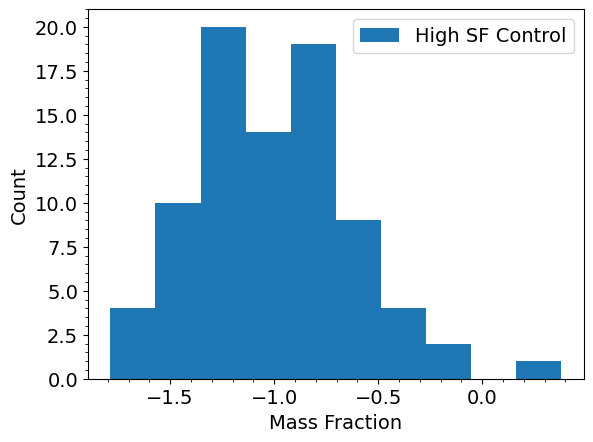

In [12]:
# If we want to plot a single histogram, that is, a histogram showing distribution of one parameter for one sample, we can use the plotSingleHistogram function. Consult the documentation for all the
# parameters that could be passed on to this function. In this example, we plot the histogram of HI Mass Fraction of High SF Control sample.
myResearch.plotSingleHistogram(sample=control1, parameterName="Mass Fraction")

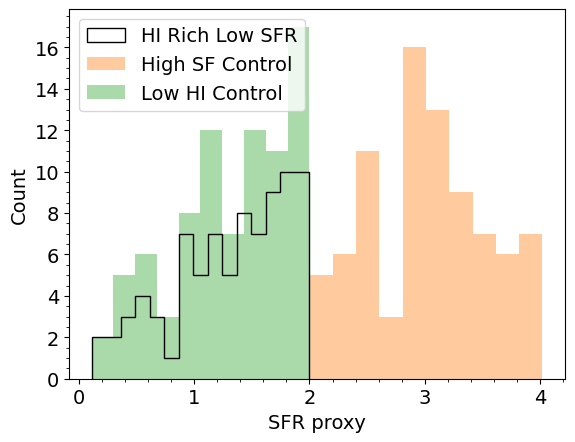

In [13]:
# If we want to plot a stacked histogram, that is, a histogram showing distribution of one parameter for all samples, we can use the plotStackedHistogram function. Consult the documentation for all the
# parameters that could be passed on to this function. In this example, we plot the histogram of SFR proxy. 
myResearch.plotStackedHistogram(parameterName="SFR proxy", alpha=0.4)

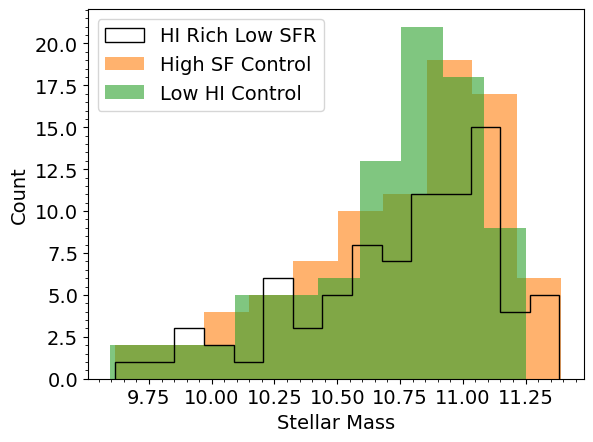

In [14]:
# In this example, we plot the stacked histogram of Stellar Mass. 
myResearch.plotStackedHistogram(parameterName="Stellar Mass", alpha=0.6)